In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re
%matplotlib inline

In [2]:
float_patt = '[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?'
re_point2d = re.compile('\( *' + float_patt + ', *' + float_patt + ' *\)')
re_float = re.compile('[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?')

def parse_point2d(s):
    return map(float, s.strip('()\n ').split(', '))

def parse_wpoint2d(s):
    return map(float, re.findall(re_float, s))
               
def parse_rectangle2d(s):
    pt_list = re.findall(re_point2d, s.strip('{}\n '))
    return map(parse_point2d, pt_list)

def read_points(fname):
    point_list = []
    with open(fname, 'r') as f:
        for line in f:
            point_list.append(parse_point2d(line))
    arr = np.array(point_list)
    return arr

def read_wpoints(fname):
    point_list = []
    with open(fname, 'r') as f:
        for line in f:
            point_list.append(parse_wpoint2d(line)[:-1])
    arr = np.array(point_list)
    return arr

def read_rectangles(fname):
    rectangle_list = []
    with open(fname, 'r') as f:
        for line in f:
            rectangle_list.append(parse_rectangle2d(line))
    return rectangle_list


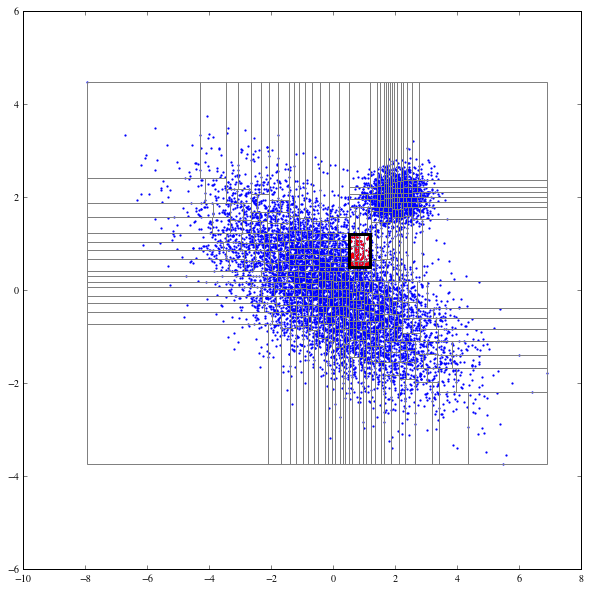

In [3]:
leaves = read_wpoints('kdtree2_leaves.out')
result = read_wpoints('kdtree2_results.out')
query_rectangle = read_rectangles('kdtree2_query_rectangle.out')
partitions = read_rectangles('kdtree2_partitions.out')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(leaves[:,0], leaves[:,1], marker='.', linewidth=0)
ax.scatter(result[:,0], result[:,1], marker='.', linewidth=0, color='r')

for r in partitions:
    ax.add_patch(
        patches.Rectangle(
            (r[0][0], r[1][0]), r[0][1]-r[0][0], r[1][1]-r[1][0], 
            fill=False, linewidth=1, color='gray'
        )
)
    
for r in query_rectangle:
    ax.add_patch(
        patches.Rectangle(
            (r[0][0], r[1][0]), r[0][1]-r[0][0], r[1][1]-r[1][0], 
            fill=False, linewidth=3
    )
)